# Chapter 9 - Problem 6

At the end of Section 9.6.1, it is claimed that in the case of data that
is just barely linearly separable, a support vector classifier with a
small value of cost that misclassifies a couple of training observations
may perform better on test data than one with a huge value of cost
that does not misclassify any training observations. You will now
investigate this claim.

**A.** Generate two-class data with p = 2 in such a way that the classes
are just barely linearly separable.

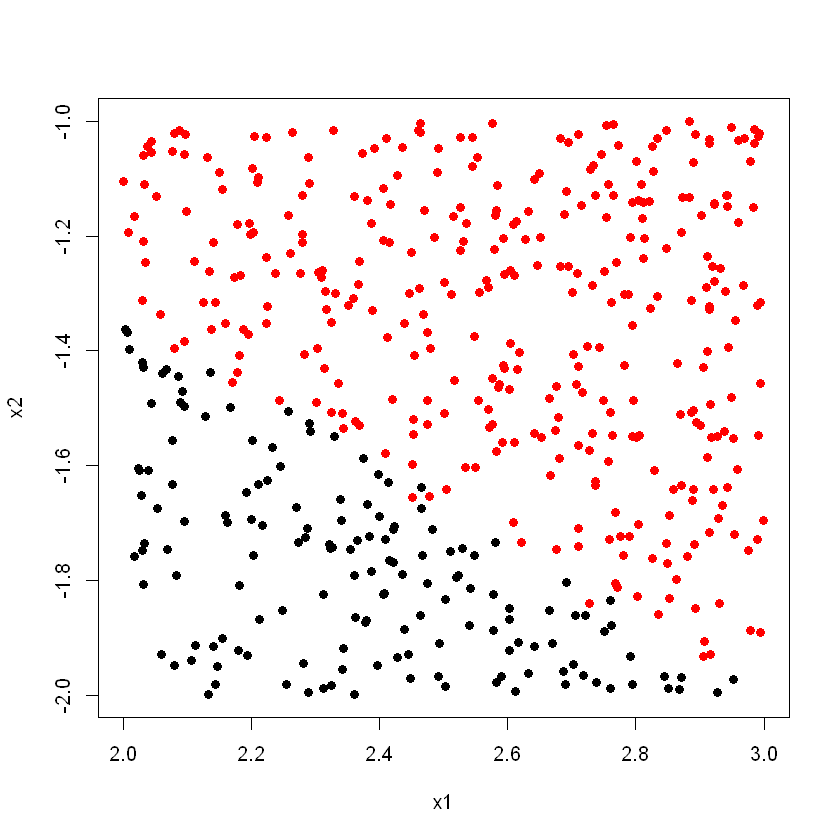

In [112]:
set.seed(1087)
x1 <- runif(500) + 2
x2 <- runif(500) - 2
eps <- rnorm(500, sd = 0.05)

y <- 2*x1 + 3*x2+ eps > 0
plot(x1,x2,col = y+1, pch = 19)

**B.** Compute the cross-validation error rates for support vector
classifiers with a range of cost values. How many training errors
are misclassified for each value of cost considered, and how
does this relate to the cross-validation errors obtained?

In [113]:
library(e1071)
data <- data.frame(x1,x2,y = as.factor(y))
train <- sample(1:500,400)
train.set <- data[train,]
test.set <- data[-train,]

folds <- sample(rep(1:10,length.out = nrow(train.set)))

cv.error <- matrix(NA,8,10)

cost =  c(0.001,0.01,0.1,1,10,100,1000,10000)

for (i in 1:length(cost)){
    
    for (k in 1:10){
        svmfit <- svm(y~.,data = train.set[folds!=k,],cost = cost[i], kernel = "linear")
        prob <- predict(svmfit,newdata = train.set[folds == k,1:2])
        results <- table(prob,train.set[folds == k,3])
        cv.error[i,k] <- (results[2,1]+results[1,2])/nrow(train.set[folds == k,])
    }
}

rmse.cv <- apply(cv.error,1,mean)
data.frame(cost,rmse.cv)

cost,rmse.cv
1e-03,0.3050
1e-02,0.0725
1e-01,0.0200
1e+00,0.0200
1e+01,0.0200
1e+02,0.0175
1e+03,0.0200
1e+04,0.0150


In [114]:
data.frame(cost = cost,misclass = rmse.cv*nrow(data))

cost,misclass
1e-03,152.50
1e-02,36.25
1e-01,10.00
1e+00,10.00
1e+01,10.00
1e+02,8.75
1e+03,10.00
1e+04,7.50


Model reaches a minimum of training CV error at a cost of 10000 with the minimum number of training misclassifications.

**C.** Generate an appropriate test data set, and compute the test
errors corresponding to each of the values of cost considered.
Which value of cost leads to the fewest test errors, and how
does this compare to the values of cost that yield the fewest
training errors and the fewest cross-validation errors?

In [118]:

test.error <- rep(NA,length(cost))

for (i in 1:length(cost)){
    svmfit <- svm(y~.,data = train.set,cost = cost[i], kernel = "linear")
    test.pred <- predict(svmfit,test.set)
    results <- table(test.pred,test.set[,3])
    test.error[i] <- (results[2,1]+results[1,2])/nrow(test.set)
}

data.frame(cost, test.error)

cost,test.error
1e-03,0.31
1e-02,0.13
1e-01,0.06
1e+00,0.03
1e+01,0.03
1e+02,0.03
1e+03,0.03
1e+04,0.03


The minimum test misclassification error is attained at 1, way lower than the 10000 cost value obtained when analyzing the training data set.

In [119]:
tune.out = tune(svm, y ~ ., data = train.set, kernel = "linear", ranges = list(cost = cost))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  100

- best performance: 0.0175 

- Detailed performance results:
   cost  error dispersion
1 1e-03 0.3050 0.06645801
2 1e-02 0.0800 0.04377975
3 1e-01 0.0200 0.02297341
4 1e+00 0.0225 0.01419116
5 1e+01 0.0250 0.02357023
6 1e+02 0.0175 0.01687371
7 1e+03 0.0175 0.01687371
8 1e+04 0.0175 0.01687371


In [120]:
data.frame(cost = tune.out$performances$cost, misclass = tune.out$performances$error * nrow(train.set))

cost,misclass
1e-03,122
1e-02,32
1e-01,8
1e+00,9
1e+01,10
1e+02,7
1e+03,7
1e+04,7
